<h1>Machine Learning - Algoritmo Regressão Linear</h1>
<h2>Predição do sexo de pessoas com base em peso e altura</h2>

<h3>Importando as bibliotecas utilizadas</h3>

In [54]:
import matplotlib.pyplot     as py
import seaborn               as sb
import pandas                as pd
import numpy                 as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression

<h3>Importando o arquivo e alterando o nome das colunas.</h3>

In [102]:
df = pd.read_csv('C:\\Users\\gustavo.zantut\\Desktop\\e736b1673d4f4b1b5ef417e7bf5fa0a9-7b91e07bfa98a7da33383808a1ea1ea437009181\\people_data_predict_sex.csv',encoding='ISO-8859-1')
df = df.rename(columns={'Height (cm)': 'height', 'Weight (kg)': 'weight','Sex (m/f)': 'sex'})
df

,height,weight,sex
0,172,62,Male
1,187,98,Male
2,153,70,Female
3,183,90,Male
4,173,68,Female
5,173,53,Female
6,176,52,Female
7,173,56,Female
8,160,50,Female
9,175,87,Male


<h3>-Dicionário de dados:</h3>
    <ol>
<li>height: altura(cm);</li>
<li>weight: peso(kg);</li>
<li>sex: sexo(Masculino(Male)/Feminimo(Female)).</li>
</ol>


<h3>Substituindo as informações da coluna <i>sex</i> por uma variável dummy</h3>
<h6>Male(Masculino)=0</h6> 
<h6>Female(Feminino)=1</h6>

In [103]:
# Substituir "Homem" -> 0
df['sex'] = df['sex'].replace('Male', 0)

# Substituir "Mulher" -> 1
df['sex'] = df['sex'].replace('Female', 1)

df

,height,weight,sex
0,172,62,0
1,187,98,0
2,153,70,1
3,183,90,0
4,173,68,1
5,173,53,1
6,176,52,1
7,173,56,1
8,160,50,1
9,175,87,0


<h6>Separando os dados em variáveis e resultados</h6>
<h6>Os dados em <i>X</i> são as váriaveis de qual o resultado depende e os dados em <i>Y</i> o resultado </h6>

In [104]:
# Definir os valores X e Y do Dataframe
X = df[['weight', 'height']]
Y = df[['sex']]

<h6>Separando os dados de X e Y em dados de treino e dados de teste, com os dados de treino, apartir das variáveis da base de treino(X_train) ele vai traçar a regressão linear e se calibrar para se aproximar ao resultado fornecido em Y_train e com os dados de teste(X_test) ele aplica a regressão linear para testar a eficácia do seu treino comparando com os resultados em Y_test. Ou seja, o aprendizado é supervisionado</h6>

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)
# Exibir massa de teste
dfteste1=pd.DataFrame()
dfteste1["height"]=X_test["height"]
dfteste1["weight"]= X_test["weight"]
dfteste1["sex"]=y_test["sex"]
dfteste1

,height,weight,sex
8,160,50,1
5,173,53,1
6,176,52,1
13,170,80,0
4,173,68,1
3,183,90,0


<h6>Como podemos observar a massa de teste é de aproximadamente 1/3 da base</h6>

<h6>Criando o modelo apartir da função que desejamos usar, a função de regressão linear e fornecendo os dados de treino e de teste. Aqui que a máquina cria a função daregressão linear dos nossos dados de treino para aplicar nos dados de teste</h6>

In [138]:
# Treinar o dado no modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<h6>Resultado da predição com a base de teste</h6>

In [139]:
# Testar o modelo
predictions = model.predict(X_test)
predictions

array([[0.67978581],
       [0.58402348],
       [0.57787199],
       [0.34516321],
       [0.44267054],
       [0.18343618]])

<h6>Plotando o erro da predição para avaliar sua eficiência, podemos observar que homens com baixo IMC (Índice de Massa Corporal) foram classificados como mulheres e mulheres com alto IMC foram classificados como homens, provavelmente devido à limitação na quantidade de dados</h6>

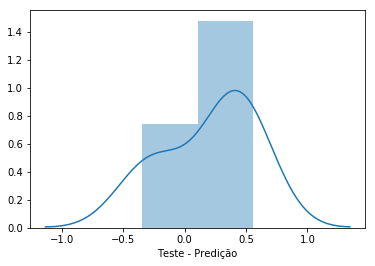

In [140]:
sb.distplot(y_test - predictions, axlabel="Teste - Predição")
py.show()

<h6>Avaliando a predição da base de teste</h6>

In [141]:
#Resultado da predição para a base de teste
df1 = dfteste1
df1["Predição"] = predictions
df1["Sexo predição"] = np.where(df1["Predição"]>0.5, 1, 0)
df1["Predição Correta?"] = np.where(df1["sex"]==df1["Sexo predição"],"Sim","Não")
df1   
    

,height,weight,sex,Predição,Sexo predição,Predição Correta?
8,160,50,1,0.679786,1,Sim
5,173,53,1,0.584023,1,Sim
6,176,52,1,0.577872,1,Sim
13,170,80,0,0.345163,0,Sim
4,173,68,1,0.442671,0,Não
3,183,90,0,0.183436,0,Sim


<h6>Simulando a predição com alguns dados novos</h6>

In [142]:
#Prever resultados usando a massa treinada
# 100  -> 52 Kg  (Weight)
# 182 -> 153 cm (Height)
myvals = np.array([100, 182]).reshape(1, -1)
print(model.predict(myvals)) 

myvals = np.array([52, 153]).reshape(1, -1)
print(model.predict(myvals)) 

# Quanto mais próximo de 0, mais possui característica de Homem
# Quanto mais próximo de 1, mais possui característica de Mulher

[[0.09439256]]
[[0.69728045]]


<h6>Aqui podemos entender porque a classificação do nosso modelo depende muito do peso, sua diferença é muito grande entre homens e mulheres</h6>

In [143]:
#mediana dos pesos e alturas
from statistics import median
print ("mediana de peso das mulheres: "+str(median(df["weight"][df["sex"]==1])))
print ("mediana de altura das mulheres: "+str(median(df["height"][df["sex"]==1])))
print ("mediana de peso dos homens: "+str(median(df["weight"][df["sex"]==0])))
print ("mediana de altura dos homens: "+str(median(df["height"][df["sex"]==0])))

mediana de peso das mulheres: 61.0
mediana de altura das mulheres: 171.0
mediana de peso dos homens: 80
mediana de altura dos homens: 172


<h2>Sumário estatístico masculino</h2>

In [144]:
dfmale = df[df["sex"]==0]
dfmale.describe()

,height,weight,sex
count,11.000000,11.000000,11.0
mean,174.727273,81.363636,0.0
std,10.677930,20.412118,0.0
min,162.000000,53.000000,0.0
25%,165.500000,65.500000,0.0
50%,172.000000,80.000000,0.0
75%,182.500000,94.000000,0.0
max,195.000000,122.000000,0.0


<h2>Sumário estatístico feminino</h2>

In [145]:
dffemale = df[df["sex"]==1]
dffemale.describe()

,height,weight,sex
count,10.000000,10.000000,10.0
mean,167.700000,60.300000,1.0
std,7.660142,7.273239,0.0
min,153.000000,50.000000,1.0
25%,162.000000,53.750000,1.0
50%,171.000000,61.000000,1.0
75%,173.000000,66.500000,1.0
max,176.000000,70.000000,1.0


<h6>Gráfico de dispersão de peso x altura segregado por genero</h6>

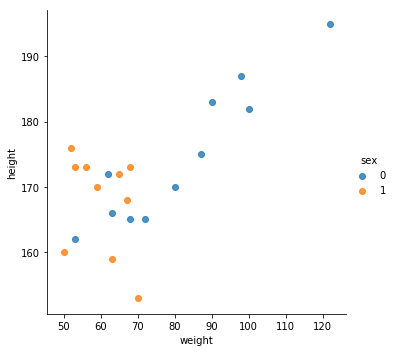

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
k= sns.lmplot(data=df, x="weight", y="height", fit_reg=0,hue="sex")

<h2>Distribuição de alturas</h2>

<h6>Homens</6>

(array([3., 1., 1., 2., 0., 0., 2., 1., 0., 1.]),
 array([162. , 165.3, 168.6, 171.9, 175.2, 178.5, 181.8, 185.1, 188.4,
        191.7, 195. ]),
 <a list of 10 Patch objects>)

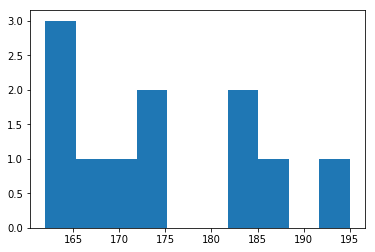

In [147]:
plt.hist(dfmale["height"])

<h6>Mulheres</6>

(array([1., 0., 1., 1., 0., 0., 1., 1., 4., 1.]),
 array([153. , 155.3, 157.6, 159.9, 162.2, 164.5, 166.8, 169.1, 171.4,
        173.7, 176. ]),
 <a list of 10 Patch objects>)

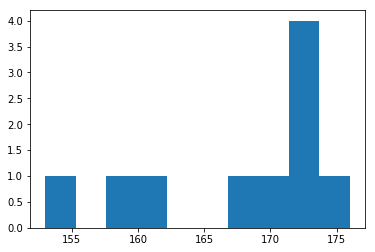

In [148]:
plt.hist(dffemale["height"])

<h2>Distribuição de peso</h2>

<h6>Homens</6>

(array([1., 2., 2., 1., 1., 1., 2., 0., 0., 1.]),
 array([ 53. ,  59.9,  66.8,  73.7,  80.6,  87.5,  94.4, 101.3, 108.2,
        115.1, 122. ]),
 <a list of 10 Patch objects>)

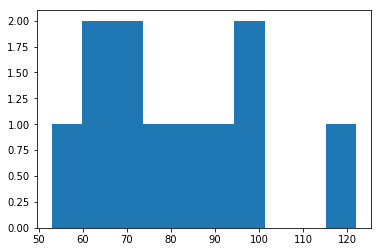

In [149]:
plt.hist(dfmale["weight"])

<h6>Mulheres</6>

(array([1., 2., 0., 1., 1., 0., 1., 1., 1., 2.]),
 array([50., 52., 54., 56., 58., 60., 62., 64., 66., 68., 70.]),
 <a list of 10 Patch objects>)

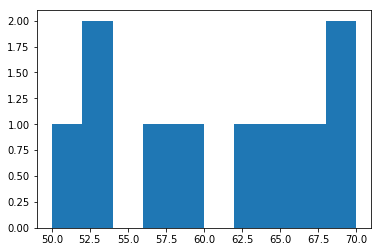

In [150]:
plt.hist(dffemale["weight"])

<h2>Correlação linear entre peso e altura dos homens</h2>

0.9350792807919195

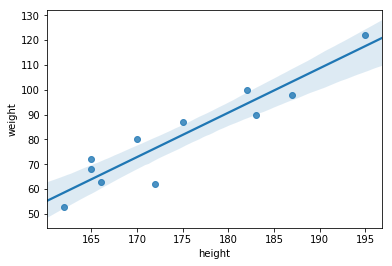

In [151]:
sns.regplot(data=dfmale, x='height', y='weight')
dfmale["height"].corr(dfmale["weight"])

<h2>Correlação linear entre peso e altura das mulheres</h2>

-0.31330621541009146

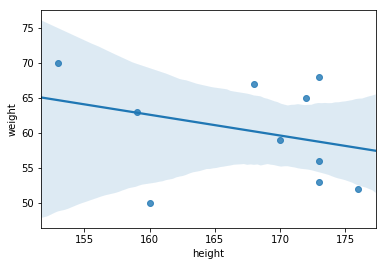

In [152]:
sns.regplot(data=dffemale, x='height', y='weight')
dffemale["height"].corr(dffemale["weight"])

<h2>Conclusão</h2>
<h6>Os resultados foram muito bons para uma IA tão simples, com baixa taxa de erros e obtendo os resultados desejados na maioria das vezes. Observou-se que homens com baixo IMC (Índice de Massa Corporal) foram classificados como mulheres e mulheres com alto IMC foram classificados como homens. Isso aconteceu provavelmente porque havia um baixo intervalo de dados para treinar a IA e, portanto, isso poderia ser resolvido com a obtenção de mais dados e o treinamento da IA novamente.</h6>